# Adaptation behavior

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 1s
Starting simulation at t=1. s for a duration of 3. s
3.0 (100%) simulated in 3s
Starting simulation at t=4. s for a duration of 1. s
1.0 (100%) simulated in 1s


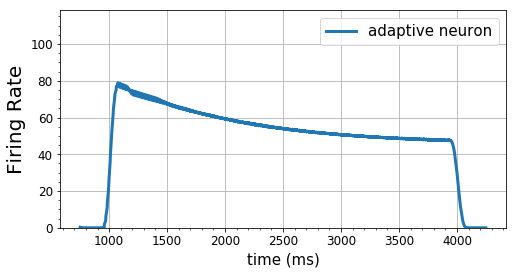

In [2]:
from brian2 import *
import numpy as np
import pickle
#set_device('cpp_standalone') #, build_on_run=False
start_scope()

def plot_vars(statemon, rate, n, m, prefix, name, show_variables = True):
    fig = figure(figsize=(8,4))
    plot(statemon.t[int(duration*n*10):int(duration*m*10)]/ms, rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)],linewidth = 3, label = name)
    xlabel('time (ms)', fontsize = 15)
    ylabel('Firing Rate', fontsize = 20)
    ylim([0,1.5*np.max(rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz)])
    plt.grid(True)
    plt.legend(fontsize=15)
    plt.minorticks_on()
    plt.tick_params(labelsize=12)
    plt.show()
    fig.savefig( "img\\" +prefix + '_' + str(name) + '.png', format='png')
    
    if show_variables:
        list_of_params = statemon.record_variables
        for i in range(len(list_of_params)):
            fig = figure(figsize=(8,4))
            plot(statemon.t[int(duration*n*10):int(duration*m*10)]/ms, eval('statemon.'+str(statemon.record_variables[i]))[0][int(duration*n*10):int(duration*m*10)])
            xlabel('time (ms)', fontsize = 15)
            ylabel(str(list_of_params[i]), fontsize = 20)
            # ylim([0,60])
            plt.grid(True)
            plt.minorticks_on()
            plt.tick_params(labelsize=12)
            fig.savefig( "img\\" + prefix + '_' + str(name) +'_'+ str(list_of_params[i]) +  '.png', format='png')
            plt.show()

eqs_adaptive = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - x*u*mV  - IsynE)/(1*ms)  : volt # - (INaP)
alpha = 0.0125/3 : 1
U0 = -62.5*mV : volt
Ubase = -0*mV :volt
x = 0.06 : 1
a = 0.0011/2 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.0: 1

IsynE = (gE*(wE+wE2) + g_Edrive)*(v - v_synE): volt
gE = 0.1/3 : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
y : 1
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
dwE2/dt = -wE2/tauE : 1
tauE = 10*ms : second
c = -55*mV   : volt 
d : 1
'''

N = 100

nrn = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') 

nrn.v  = -(30 + 0.70*rand(1,N))*mV
nrn.u  = (0 + 0.30*rand(1,N))*1
nrn.d = (+0.3 + 0.05*rand(1,N))

nrn_statemon = StateMonitor(nrn, ['v','IsynE'], record = True)
nrn_spikemon = SpikeMonitor(nrn)
nrn_rate = PopulationRateMonitor(nrn)

nrn.y = 0.0
run(1000*ms, report='text')
nrn.y = 0.5
run(3000*ms, report='text')
nrn.y = 0.0
run(1000*ms, report='text')

duration = 5000
plot_vars(nrn_statemon, nrn_rate, 0.15, 0.85,"","adaptive neuron", show_variables = False)

# Bursting behavior

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]


Starting simulation at t=0. s for a duration of 10. s
9.6957 (96%) simulated in 10s, estimated < 1s remaining.
10.0 (100%) simulated in 10s


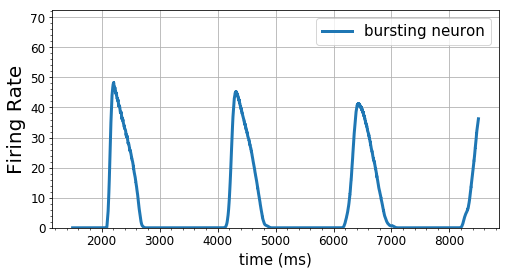

In [12]:
from brian2 import *
import numpy as np
import pickle
#set_device('cpp_standalone') #, build_on_run=False
start_scope()

def plot_vars(statemon, rate, n, m, prefix, name, show_variables = True):
    fig = figure(figsize=(8,4))
    plot(statemon.t[int(duration*n*10):int(duration*m*10)]/ms, rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)],linewidth = 3, label = name)
    xlabel('time (ms)', fontsize = 15)
    ylabel('Firing Rate', fontsize = 20)
    ylim([0,1.5*np.max(rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz)])
    plt.grid(True)
    plt.legend(fontsize=15)
    plt.minorticks_on()
    plt.tick_params(labelsize=12)
    plt.show()
    fig.savefig( "img\\" +prefix + '_' + str(name) + '.png', format='png')
    
    if show_variables:
        list_of_params = statemon.record_variables
        for i in range(len(list_of_params)):
            fig = figure(figsize=(8,4))
            plot(statemon.t[int(duration*n*10):int(duration*m*10)]/ms, eval('statemon.'+str(statemon.record_variables[i]))[0][int(duration*n*10):int(duration*m*10)])
            xlabel('time (ms)', fontsize = 15)
            ylabel(str(list_of_params[i]), fontsize = 20)
            # ylim([0,60])
            plt.grid(True)
            plt.minorticks_on()
            plt.tick_params(labelsize=12)
            fig.savefig( "img\\" + prefix + '_' + str(name) +'_'+ str(list_of_params[i]) +  '.png', format='png')
            plt.show()

eqs_bursting = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - 0.1*u*mV  - IsynE)/(1*ms)  : volt # - (INaP)
alpha = 0.004 : 1
U0 = -62.5*mV : volt
Ubase = -1.6*mV :volt
a = 0.001 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.2: 1

IsynE = (gE*wE + g_Edrive)*(v - v_synE): volt
gE = 0.1 : 1
y : 1
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
dwE2/dt = -wE2/tauE : 1
tauE = 10*ms : second
c = -50*mV   : volt 
d : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
'''

N = 100

nrn = NeuronGroup(N, eqs_bursting, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') 

nrn.v  = -(30 + 0.70*rand(1,N))*mV
nrn.u  = (0 + 0.30*rand(1,N))*1
nrn.d = (+0.3 + 0.05*rand(1,N))

nrn_statemon = StateMonitor(nrn, ['v','IsynE'], record = True)
nrn_spikemon = SpikeMonitor(nrn)
nrn_rate = PopulationRateMonitor(nrn)

nrn.y = 0.09
run(10000*ms, report='text')

duration = 10000
plot_vars(nrn_statemon, nrn_rate, 0.15, 0.85,"","bursting neuron", show_variables = False)

# Full model

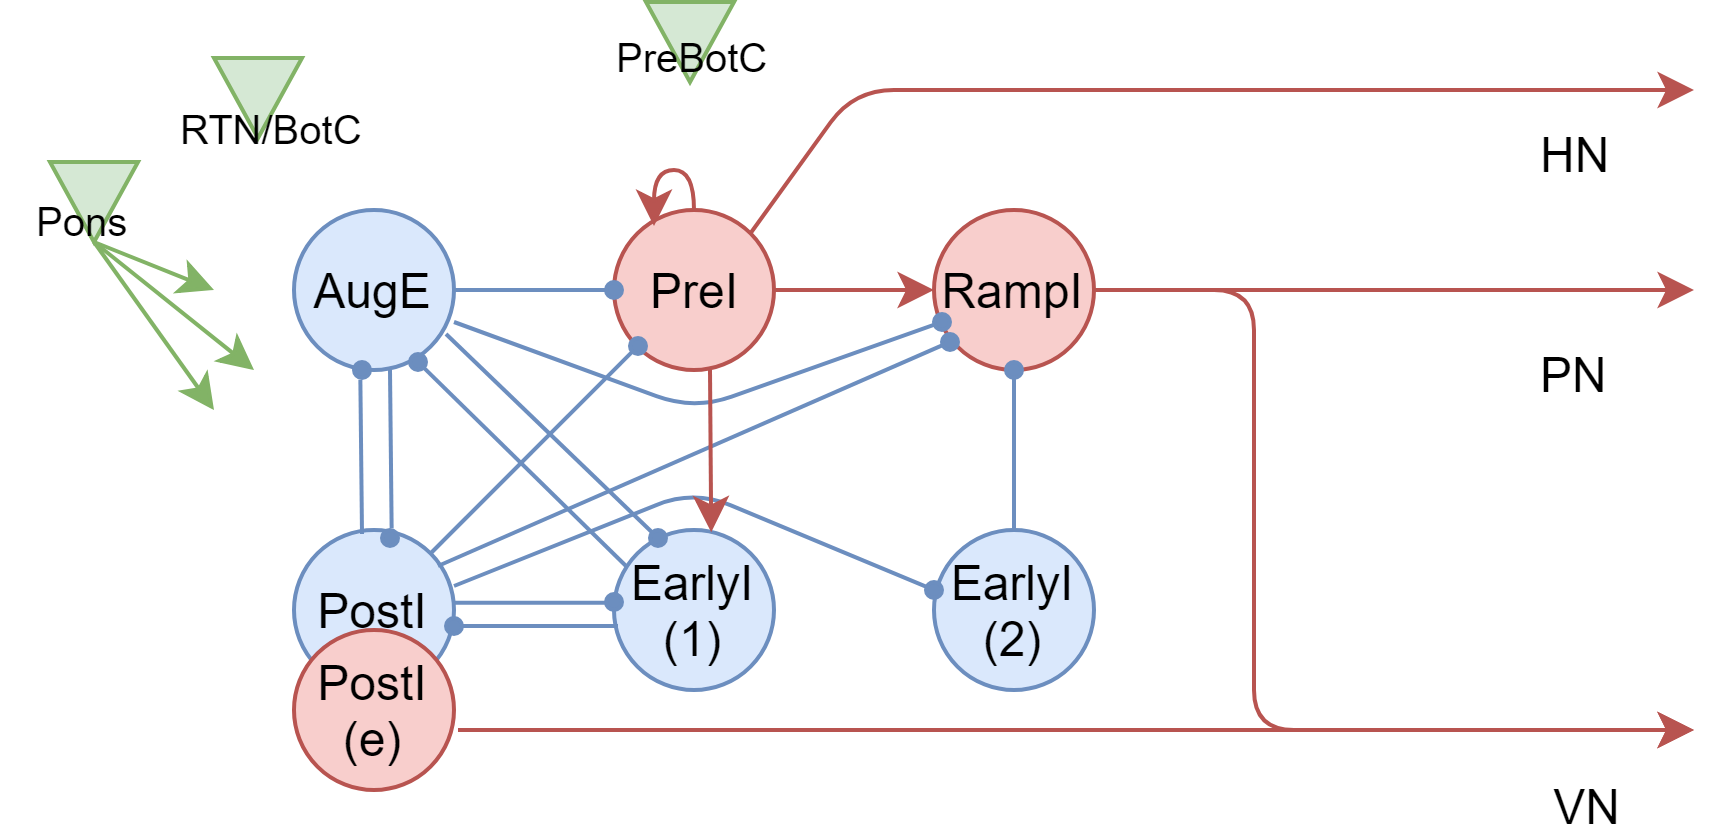

In [34]:
from IPython.display import Image
Image(filename='rCPG model.png')

In [13]:
from brian2 import *
import numpy as np
import pickle
#set_device('cpp_standalone') #, build_on_run=False
start_scope()

In [14]:
eqs_adaptive = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - x*u*mV  - IsynE - IsynI)/(1*ms)  : volt # - (INaP)
alpha = 0.0125/3 : 1
U0 = -62.5*mV : volt
Ubase = -0*mV :volt
x = 0.06 : 1
a = 0.0011/2 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.0: 1

IsynE = (gE*(wE+wE2) + g_Edrive)*(v - v_synE): volt
gE = 0.1/3 : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
y : 1
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
dwE2/dt = -wE2/tauE : 1
tauE = 10*ms : second

IsynI = gE*(wI_1 + wI_2 + wI_3)*(v - v_synI): volt
gI = 1 : 1
v_synI = -75*mV : volt
dwI_1/dt = -wI_1/tauI : 1
dwI_2/dt = -wI_2/tauI : 1
dwI_3/dt = -wI_3/tauI : 1
tauI = 15*ms : second
c = -55*mV   : volt 
d : 1
'''

eqs_bursting = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - 0.1*u*mV  - IsynE - IsynI)/(1*ms)  : volt # - (INaP)
alpha = 0.004 : 1
U0 = -62.5*mV : volt
Ubase = -1.6*mV :volt
a = 0.0011 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.2: 1

IsynE = (gE*wE + g_Edrive)*(v - v_synE): volt
gE = 0.1 : 1
y : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
tauE = 10*ms : second

IsynI = gE*(wI_1 + wI_2 + wI_3)*(v - v_synI): volt
gI = 0.1 : 1
v_synI = -75*mV : volt
dwI_1/dt = -wI_1/tauI : 1
dwI_2/dt = -wI_2/tauI : 1
dwI_3/dt = -wI_3/tauI : 1
tauI = 15*ms : second
c = -50*mV   : volt #- (1*mV)*(u + 12.5)
d : 1
'''

N = 100

PreI = NeuronGroup(N, eqs_bursting, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PreI.v  = -(30 + 0.70*rand(1,N))*mV
PreI.u  = (0 + 0.30*rand(1,N))*1
PreI.d = (+0.3 + 0.05*rand(1,N))

EarlyI1 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI1.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI1.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI1.u  = (0 + 0.30*rand(1,N))*1

AugE = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
AugE.d  = (+0.5 + 0.05*rand(1,N))*1
AugE.v  = -(30 + 0.70*rand(1,N))*mV
AugE.u  = (0 + 0.30*rand(1,N))*1

PostI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI.d  = (+0.5 + 0.05*rand(1,N))*1
PostI.v  = -(30 + 0.70*rand(1,N))*mV
PostI.u  = (0 + 0.30*rand(1,N))*1

PostI_e = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI_e.d  = (+0.5 + 0.05*rand(1,N))*1
PostI_e.v  = -(30 + 0.70*rand(1,N))*mV
PostI_e.u  = (0 + 0.30*rand(1,N))*1

RampI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
RampI.d  = (+0.5 + 0.05*rand(1,N))*1
RampI.v  = -(30 + 0.70*rand(1,N))*mV
RampI.u  = (0 + 0.30*rand(1,N))*1

EarlyI2 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI2.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI2.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI2.u  = (0 + 0.30*rand(1,N))*1

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]


In [15]:
#connecting populations
PreI_PreI = Synapses(PreI, PreI,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_PreI.connect(p=0.125)
PreI_PreI.delay = 2*ms

PreI_EarlyI1 = Synapses(PreI, EarlyI1,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_EarlyI1.connect(p=0.8)

AugE_PreI = Synapses(AugE, PreI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') # 0.02
AugE_PreI.connect(p=0.08)

# PreI_AugE = Synapses(PreI,AugE,  on_pre='wI_3_post += 0.001') 
# PreI_AugE.connect(p=1)


AugE_EarlyI1 = Synapses(AugE, EarlyI1,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI1.connect(p=0.5)

EarlyI1_AugE = Synapses(EarlyI1, AugE,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_AugE.connect(p=0.5)

# EarlyI1_PreI = Synapses(EarlyI1, PreI,  on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
# EarlyI1_PreI.connect(p=0.05)
################################

PostI_EarlyI1 = Synapses(PostI, EarlyI1,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI1.connect(p=0.5)

PostI_AugE = Synapses(PostI, AugE,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_AugE.connect(p=0.7)

EarlyI1_PostI = Synapses(EarlyI1, PostI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI.connect(p=0.5)

AugE_PostI = Synapses(AugE, PostI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI.connect(p=0.1)

PostI_PreI = Synapses(PostI, PreI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
PostI_PreI.connect(p=0.15)

# AugE_AugE = Synapses(AugE, AugE,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
# AugE_AugE.connect(p=0.5, condition = 'i!=j')


#####################################
AugE_PostI_e = Synapses(AugE, PostI_e, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI_e.connect(p=0.13)

EarlyI1_PostI_e = Synapses(EarlyI1, PostI_e, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI_e.connect(p=0.5)

PreI_RampI = Synapses(PreI, RampI, on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_RampI.connect(p=0.625)

EarlyI1_RampI = Synapses(EarlyI1, RampI, on_pre='wE2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_RampI.connect(p=0.625)

AugE_RampI = Synapses(AugE, RampI, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_RampI.connect(p=0.5)

PostI_RampI = Synapses(PostI, RampI, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_RampI.connect(p=0.2)

EarlyI2_RampI = Synapses(EarlyI2, RampI, on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
EarlyI2_RampI.connect(p=0.8)

AugE_EarlyI2 = Synapses(AugE, EarlyI2, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI2.connect(p=0.2)

PostI_EarlyI2 = Synapses(PostI, EarlyI2, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI2.connect(p=0.2)

#monitorings, spikes etc.
PreI_statemon = StateMonitor(PreI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PreI_spikemon = SpikeMonitor(PreI)
PreI_rate = PopulationRateMonitor(PreI)

EarlyI1_statemon = StateMonitor(EarlyI1, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI1_spikemon = SpikeMonitor(EarlyI1)
EarlyI1_rate = PopulationRateMonitor(EarlyI1)

AugE_statemon = StateMonitor(AugE, ['v','wE','wI_1','wI_2','wI_3'], record = False)
AugE_spikemon = SpikeMonitor(AugE)
AugE_rate = PopulationRateMonitor(AugE)

PostI_statemon = StateMonitor(PostI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_spikemon = SpikeMonitor(PostI)
PostI_rate = PopulationRateMonitor(PostI)

EarlyI2_statemon = StateMonitor(EarlyI2, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI2_spikemon = SpikeMonitor(EarlyI2)
EarlyI2_rate = PopulationRateMonitor(EarlyI2)

RampI_statemon = StateMonitor(RampI, ['v','wE','wE2','wI_1','wI_2','wI_3'], record = False)
RampI_spikemon = SpikeMonitor(RampI)
RampI_rate = PopulationRateMonitor(RampI)

PostI_e_statemon = StateMonitor(PostI_e, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_e_spikemon = SpikeMonitor(PostI_e)
PostI_e_rate = PopulationRateMonitor(PostI_e)
#running the simulation


AugE.y = 0 + 1 + 0.8
EarlyI1.y = 0 + 0.6+ 0.6 #0.5
PreI.y = 0.1 + 0.2 + 0.3 #0.1 0.2 0.3 
PostI.y = 0 + 0.0 + 0.9
PostI_e.y = 0 + 0.0 + 0.6 
RampI.y = 0 + 0.0 + 0.0
EarlyI2.y = 0 + 0.0 + 0.2
duration = 25000
run(duration*ms, report='text')
# device.build(directory='output', compile=True, run=True, debug=False)

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.02s, trying other methods took 0.19s). [brian2.stateupdaters.base.method_choice]
WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (t

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "wE_post += 0.08 * (1.0 + (0.1 * randn())) (in-place)"
 [brian2.codegen.generators.base]


Starting simulation at t=0. s for a duration of 25. s
0.861 (3%) simulated in 10s, estimated 4m 40s remaining.
1.7807000000000004 (7%) simulated in 20s, estimated 4m 21s remaining.
2.6732 (10%) simulated in 30s, estimated 4m 11s remaining.
3.6907 (14%) simulated in 40s, estimated 3m 51s remaining.
4.6822 (18%) simulated in 50s, estimated 3m 37s remaining.
5.6487 (22%) simulated in 1m 0s, estimated 3m 26s remaining.
6.5867 (26%) simulated in 1m 10s, estimated 3m 16s remaining.
7.4547 (29%) simulated in 1m 20s, estimated 3m 8s remaining.
8.346300000000001 (33%) simulated in 1m 30s, estimated 3m 0s remaining.
9.273200000000001 (37%) simulated in 1m 40s, estimated 2m 50s remaining.
10.2311 (40%) simulated in 1m 50s, estimated 2m 39s remaining.
11.1979 (44%) simulated in 2m 0s, estimated 2m 28s remaining.
12.1681 (48%) simulated in 2m 10s, estimated 2m 17s remaining.
13.1188 (52%) simulated in 2m 20s, estimated 2m 7s remaining.
14.0209 (56%) simulated in 2m 30s, estimated 1m 57s remaining.


In [16]:
n = 0.2
m = 0.9

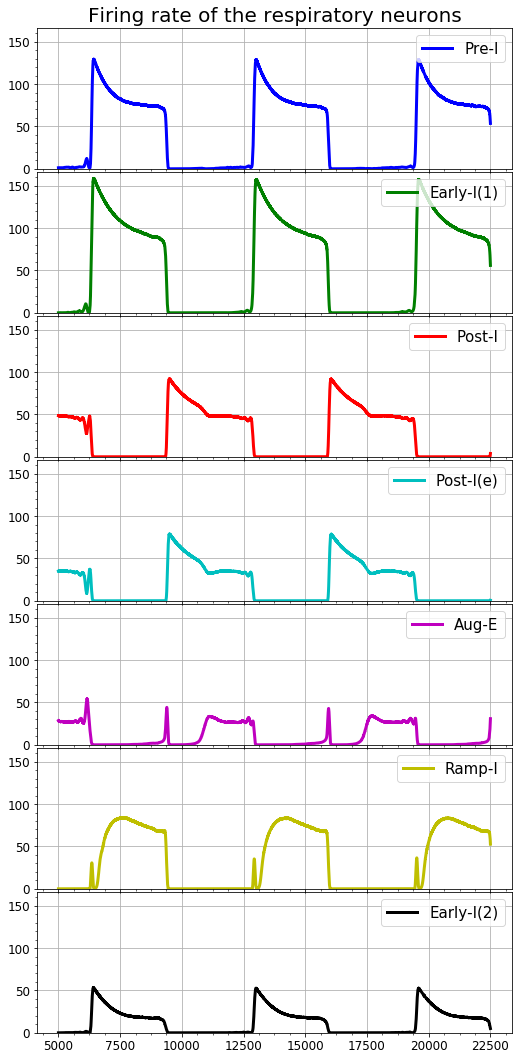

In [18]:
t = PreI_statemon.t[int(duration*n*10):int(duration*m*10)]/ms
y1 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y2 = EarlyI1_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y3 = PostI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y4 = PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y5 = AugE_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y6 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y7 = EarlyI2_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz

# plt.xlabel("time, ms", labelpad=50, fontsize = 20)
axs = []
lbl = ["Pre-I","Early-I(1)", "Post-I","Post-I(e)","Aug-E","Ramp-I","Early-I(2)"]
clr = ["b","g","r","c","m","y","k"]
data_max = []
data = [y1,y2,y3,y4,y5,y6,y7]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.49], ylim=(0, 1.05*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.49],xticklabels=[],ylim=(0, 1.05*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
plt.title("Firing rate of the respiratory neurons", fontsize = 20)
plt.show()


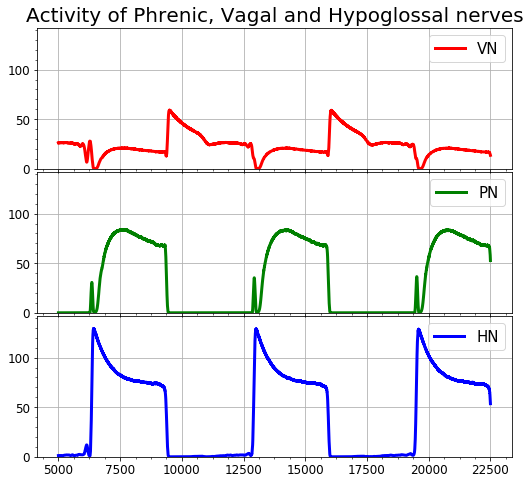

In [19]:
y8 = (6.0/8.0)*PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz+(2.0/8.0)*RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y9 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y10 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz

y8 = y8[int(duration*n*10):int(duration*m*10)]
y9 = y9[int(duration*n*10):int(duration*m*10)]
y10 = y10[int(duration*n*10):int(duration*m*10)]

# plt.xlabel("time, ms", labelpad=50, fontsize = 20)
axs = []
lbl = ["VN","PN", "HN"]
clr = ["r","g","b"]#["#000000","#ff0000","#a05550","#f00ff0","#a0a0aa","#22f00f","#f0000f"]
data_max = []
data = [y8,y9,y10]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.49], ylim=(0, 1.1*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.49],xticklabels=[],ylim=(0, 1.1*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
plt.title("Activity of Phrenic, Vagal and Hypoglossal nerves", fontsize = 20)
plt.show()


# Full model (PreI - adaptive)

In [20]:
eqs_adaptive = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - x*u*mV  - IsynE - IsynI)/(1*ms)  : volt # - (INaP)
alpha = 0.0125/3 : 1
U0 = -62.5*mV : volt
Ubase = -0*mV :volt
x = 0.06 : 1
a = 0.0011/2 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.0: 1

IsynE = (gE*(wE+wE2) + g_Edrive)*(v - v_synE): volt
gE = 0.1/3 : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
y : 1
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
dwE2/dt = -wE2/tauE : 1
tauE = 10*ms : second

IsynI = gE*(wI_1 + wI_2 + wI_3)*(v - v_synI): volt
gI = 1 : 1
v_synI = -75*mV : volt
dwI_1/dt = -wI_1/tauI : 1
dwI_2/dt = -wI_2/tauI : 1
dwI_3/dt = -wI_3/tauI : 1
tauI = 15*ms : second
c = -55*mV   : volt 
d : 1
'''

N = 100

PreI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PreI.v  = -(30 + 0.70*rand(1,N))*mV
PreI.u  = (0 + 0.30*rand(1,N))*1
PreI.d = (+0.3 + 0.05*rand(1,N))

EarlyI1 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI1.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI1.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI1.u  = (0 + 0.30*rand(1,N))*1

AugE = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
AugE.d  = (+0.5 + 0.05*rand(1,N))*1
AugE.v  = -(30 + 0.70*rand(1,N))*mV
AugE.u  = (0 + 0.30*rand(1,N))*1

PostI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI.d  = (+0.5 + 0.05*rand(1,N))*1
PostI.v  = -(30 + 0.70*rand(1,N))*mV
PostI.u  = (0 + 0.30*rand(1,N))*1

PostI_e = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI_e.d  = (+0.5 + 0.05*rand(1,N))*1
PostI_e.v  = -(30 + 0.70*rand(1,N))*mV
PostI_e.u  = (0 + 0.30*rand(1,N))*1

RampI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
RampI.d  = (+0.5 + 0.05*rand(1,N))*1
RampI.v  = -(30 + 0.70*rand(1,N))*mV
RampI.u  = (0 + 0.30*rand(1,N))*1

EarlyI2 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI2.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI2.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI2.u  = (0 + 0.30*rand(1,N))*1

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]


In [21]:
#connecting populations
PreI_PreI = Synapses(PreI, PreI,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_PreI.connect(p=0.125)
PreI_PreI.delay = 2*ms

PreI_EarlyI1 = Synapses(PreI, EarlyI1,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_EarlyI1.connect(p=0.8)

AugE_PreI = Synapses(AugE, PreI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') # 0.02
AugE_PreI.connect(p=0.08)

# PreI_AugE = Synapses(PreI,AugE,  on_pre='wI_3_post += 0.001') 
# PreI_AugE.connect(p=1)


AugE_EarlyI1 = Synapses(AugE, EarlyI1,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI1.connect(p=0.5)

EarlyI1_AugE = Synapses(EarlyI1, AugE,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_AugE.connect(p=0.5)

# EarlyI1_PreI = Synapses(EarlyI1, PreI,  on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
# EarlyI1_PreI.connect(p=0.05)
################################

PostI_EarlyI1 = Synapses(PostI, EarlyI1,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI1.connect(p=0.5)

PostI_AugE = Synapses(PostI, AugE,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_AugE.connect(p=0.7)

EarlyI1_PostI = Synapses(EarlyI1, PostI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI.connect(p=0.5)

AugE_PostI = Synapses(AugE, PostI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI.connect(p=0.1)

PostI_PreI = Synapses(PostI, PreI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
PostI_PreI.connect(p=0.15)

# AugE_AugE = Synapses(AugE, AugE,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
# AugE_AugE.connect(p=0.5, condition = 'i!=j')


#####################################
AugE_PostI_e = Synapses(AugE, PostI_e, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI_e.connect(p=0.13)

EarlyI1_PostI_e = Synapses(EarlyI1, PostI_e, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI_e.connect(p=0.5)

PreI_RampI = Synapses(PreI, RampI, on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_RampI.connect(p=0.625)

EarlyI1_RampI = Synapses(EarlyI1, RampI, on_pre='wE2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_RampI.connect(p=0.625)

AugE_RampI = Synapses(AugE, RampI, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_RampI.connect(p=0.5)

PostI_RampI = Synapses(PostI, RampI, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_RampI.connect(p=0.2)

EarlyI2_RampI = Synapses(EarlyI2, RampI, on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
EarlyI2_RampI.connect(p=0.8)

AugE_EarlyI2 = Synapses(AugE, EarlyI2, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI2.connect(p=0.2)

PostI_EarlyI2 = Synapses(PostI, EarlyI2, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI2.connect(p=0.2)

#monitorings, spikes etc.
PreI_statemon = StateMonitor(PreI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PreI_spikemon = SpikeMonitor(PreI)
PreI_rate = PopulationRateMonitor(PreI)

EarlyI1_statemon = StateMonitor(EarlyI1, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI1_spikemon = SpikeMonitor(EarlyI1)
EarlyI1_rate = PopulationRateMonitor(EarlyI1)

AugE_statemon = StateMonitor(AugE, ['v','wE','wI_1','wI_2','wI_3'], record = False)
AugE_spikemon = SpikeMonitor(AugE)
AugE_rate = PopulationRateMonitor(AugE)

PostI_statemon = StateMonitor(PostI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_spikemon = SpikeMonitor(PostI)
PostI_rate = PopulationRateMonitor(PostI)

EarlyI2_statemon = StateMonitor(EarlyI2, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI2_spikemon = SpikeMonitor(EarlyI2)
EarlyI2_rate = PopulationRateMonitor(EarlyI2)

RampI_statemon = StateMonitor(RampI, ['v','wE','wE2','wI_1','wI_2','wI_3'], record = False)
RampI_spikemon = SpikeMonitor(RampI)
RampI_rate = PopulationRateMonitor(RampI)

PostI_e_statemon = StateMonitor(PostI_e, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_e_spikemon = SpikeMonitor(PostI_e)
PostI_e_rate = PopulationRateMonitor(PostI_e)
#running the simulation


AugE.y = 0 + 1 + 0.8
EarlyI1.y = 0 + 0.6+ 0.5
PreI.y = 0.0 + 0.0 + 0.2 #0.1 0.2 0.3 
PostI.y = 0 + 0.0 + 0.6
PostI_e.y = 0 + 0.0 + 0.6 
RampI.y = 0 + 0.0 + 0.0
EarlyI2.y = 0 + 0.0 + 0.2
duration = 25000
run(duration*ms, report='text')
# device.build(directory='output', compile=True, run=True, debug=False)

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_10', using method 'euler' (took 0.02s, trying other methods took 0.05s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_11', using method 'euler' (took 0.02s, trying other methods took 0.06s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_12', using method 'euler' (took 0.02s, trying other methods took 0.07s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_

WARNING    "t" is an internal variable of group "synapses_3", but also exists in the run namespace with the value array([ 5000. ,  5000.1,  5000.2, ..., 22499.7, 22499.8, 22499.9]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "wI_1_post += 0.08 * (1.0 + (0.1 * randn())) (in-place)"
 [brian2.codegen.generators.base]
WARNING    "t" is an internal variable of group "synapses_4", but also exists in the run namespace with the value array([ 5000. ,  5000.1,  5000.2, ..., 22499.7, 22499.8, 22499.9]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on th

Starting simulation at t=0. s for a duration of 25. s
0.9293000000000001 (3%) simulated in 10s, estimated 4m 19s remaining.
1.8464 (7%) simulated in 20s, estimated 4m 11s remaining.
2.8237 (11%) simulated in 30s, estimated 3m 56s remaining.
3.7358000000000002 (14%) simulated in 40s, estimated 3m 48s remaining.
4.691 (18%) simulated in 50s, estimated 3m 37s remaining.
5.474 (21%) simulated in 1m 0s, estimated 3m 34s remaining.
6.338500000000001 (25%) simulated in 1m 10s, estimated 3m 26s remaining.
7.3368 (29%) simulated in 1m 20s, estimated 3m 13s remaining.
8.318 (33%) simulated in 1m 30s, estimated 3m 1s remaining.
9.2936 (37%) simulated in 1m 40s, estimated 2m 49s remaining.
10.164 (40%) simulated in 1m 50s, estimated 2m 41s remaining.
11.164 (44%) simulated in 2m 0s, estimated 2m 29s remaining.
12.099400000000001 (48%) simulated in 2m 10s, estimated 2m 19s remaining.
13.0454 (52%) simulated in 2m 20s, estimated 2m 8s remaining.
13.994500000000002 (55%) simulated in 2m 30s, estimate

In [22]:
n = 0.30
m = 0.7

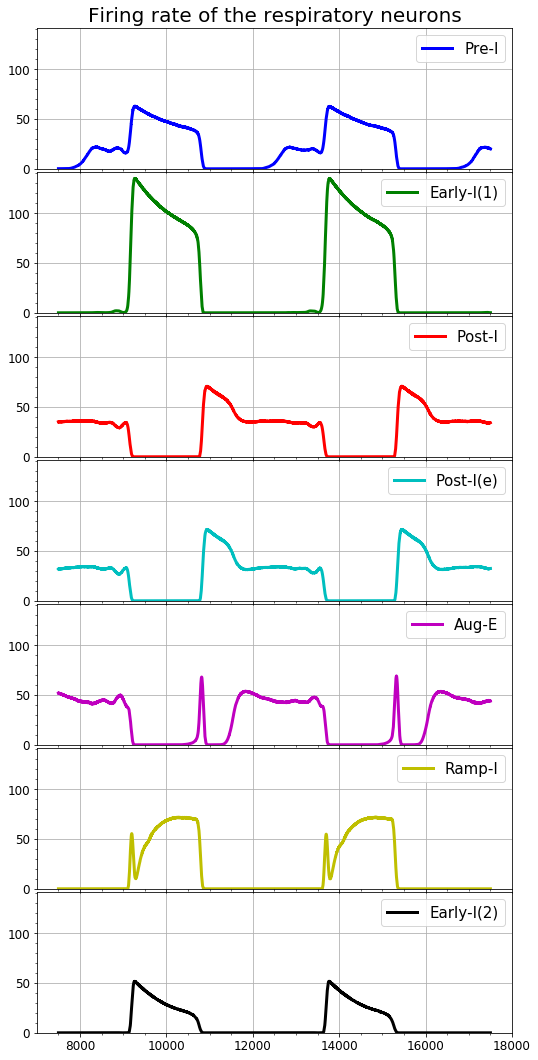

In [23]:
t = PreI_statemon.t[int(duration*n*10):int(duration*m*10)]/ms
y1 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y2 = EarlyI1_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y3 = PostI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y4 = PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y5 = AugE_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y6 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y7 = EarlyI2_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz

axs = []
lbl = ["Pre-I","Early-I(1)", "Post-I","Post-I(e)","Aug-E","Ramp-I","Early-I(2)"]
clr = ["b","g","r","c","m","y","k"]
data_max = []
data = [y1,y2,y3,y4,y5,y6,y7]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.49], ylim=(0, 1.05*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.49],xticklabels=[],ylim=(0, 1.05*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
plt.title("Firing rate of the respiratory neurons", fontsize = 20)
plt.show()

# fig.savefig("img\Medullary_model.png", format='png',pad_inches=0.2)

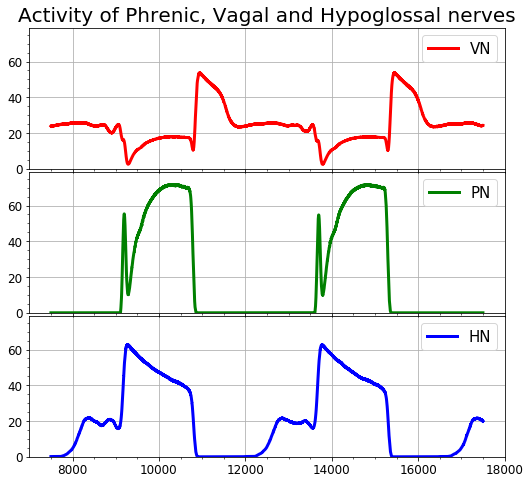

In [24]:
y8 = (6.0/8.0)*PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz+(2.0/8.0)*RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y9 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y10 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz

y8 = y8[int(duration*n*10):int(duration*m*10)]
y9 = y9[int(duration*n*10):int(duration*m*10)]
y10 = y10[int(duration*n*10):int(duration*m*10)]

# plt.xlabel("time, ms", labelpad=50, fontsize = 20)
axs = []
lbl = ["VN","PN", "HN"]
clr = ["r","g","b"]#["#000000","#ff0000","#a05550","#f00ff0","#a0a0aa","#22f00f","#f0000f"]
data_max = []
data = [y8,y9,y10]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.49], ylim=(0, 1.1*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.49],xticklabels=[],ylim=(0, 1.1*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
#     if i == 0:
#     ax.set_xlabel("time, ms", lbl[i], fontsize = 20)
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    # ylabel('Firing Rate', fontsize = 20)
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
plt.title("Activity of Phrenic, Vagal and Hypoglossal nerves", fontsize = 20)
plt.show()


# Removal of pons causes apneusis

In [25]:
from brian2 import *
import numpy as np
import pickle
#set_device('cpp_standalone') #, build_on_run=False
start_scope()

In [26]:
eqs_adaptive = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - x*u*mV  - IsynE - IsynI)/(1*ms)  : volt # - (INaP)
alpha = 0.004 : 1
U0 = -62.5*mV : volt
Ubase = -0*mV :volt
x = 0.06 : 1
a = 0.0011/2 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.0: 1

IsynE = (gE*(wE+wE2) + g_Edrive)*(v - v_synE): volt
gE = 0.1/3 : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
y : 1
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
dwE2/dt = -wE2/tauE : 1
tauE = 10*ms : second

IsynI = gE*(wI_1 + wI_2 + wI_3)*(v - v_synI): volt
gI = 1 : 1
v_synI = -75*mV : volt
dwI_1/dt = -wI_1/tauI : 1
dwI_2/dt = -wI_2/tauI : 1
dwI_3/dt = -wI_3/tauI : 1
tauI = 15*ms : second
c = -55*mV   : volt 
d : 1
'''

eqs_bursting = '''
du/dt = a*((b/mV)*v - u)/(1*ms) : 1

dv/dt = ( alpha*(v - U0)**2 /(mV) + Ubase - 0.1*u*mV  - IsynE - IsynI)/(1*ms)  : volt # - (INaP)
alpha = 0.004 : 1
U0 = -62.5*mV : volt
Ubase = -1.6*mV :volt
a = 0.0011 : 1 # interburst interval. The lesser the a, the greater IBI
b = 0.2: 1

IsynE = (gE*wE + g_Edrive)*(v - v_synE): volt
gE = 0.1 : 1
y : 1
g_Edrive = 0.1*(y) : 1 #exitatory drive #1*t/60000/ms
v_synE = -10*mV : volt
dwE/dt = -wE/tauE : 1
tauE = 10*ms : second

IsynI = gE*(wI_1 + wI_2 + wI_3)*(v - v_synI): volt
gI = 0.1 : 1
v_synI = -75*mV : volt
dwI_1/dt = -wI_1/tauI : 1
dwI_2/dt = -wI_2/tauI : 1
dwI_3/dt = -wI_3/tauI : 1
tauI = 15*ms : second
c = -50*mV   : volt #- (1*mV)*(u + 12.5)
d : 1
'''

N = 100

PreI = NeuronGroup(N, eqs_bursting, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PreI.v  = -(30 + 0.70*rand(1,N))*mV
PreI.u  = (0 + 0.30*rand(1,N))*1
PreI.d = (+0.3 + 0.05*rand(1,N))

EarlyI1 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI1.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI1.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI1.u  = (0 + 0.30*rand(1,N))*1

AugE = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
AugE.d  = (+0.5 + 0.05*rand(1,N))*1
AugE.v  = -(30 + 0.70*rand(1,N))*mV
AugE.u  = (0 + 0.30*rand(1,N))*1

PostI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI.d  = (+0.5 + 0.05*rand(1,N))*1
PostI.v  = -(30 + 0.70*rand(1,N))*mV
PostI.u  = (0 + 0.30*rand(1,N))*1

PostI_e = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
PostI_e.d  = (+0.5 + 0.05*rand(1,N))*1
PostI_e.v  = -(30 + 0.70*rand(1,N))*mV
PostI_e.u  = (0 + 0.30*rand(1,N))*1

RampI = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
RampI.d  = (+0.5 + 0.05*rand(1,N))*1
RampI.v  = -(30 + 0.70*rand(1,N))*mV
RampI.u  = (0 + 0.30*rand(1,N))*1

EarlyI2 = NeuronGroup(N, eqs_adaptive, threshold='v >= 20*mV', reset='v = c; u = u + d', refractory = 'v >= 20*mV') # method = 'exponential_euler'
EarlyI2.d  = (+0.5 + 0.05*rand(1,N))*1
EarlyI2.v  = -(30 + 0.70*rand(1,N))*mV
EarlyI2.u  = (0 + 0.30*rand(1,N))*1

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]


In [27]:
#connecting populations
PreI_PreI = Synapses(PreI, PreI,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_PreI.connect(p=0.125)
PreI_PreI.delay = 2*ms

PreI_EarlyI1 = Synapses(PreI, EarlyI1,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_EarlyI1.connect(p=0.8)

AugE_PreI = Synapses(AugE, PreI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') # 0.02
AugE_PreI.connect(p=0.08)

# PreI_AugE = Synapses(PreI,AugE,  on_pre='wI_3_post += 0.001') 
# PreI_AugE.connect(p=1)


AugE_EarlyI1 = Synapses(AugE, EarlyI1,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI1.connect(p=0.5)

EarlyI1_AugE = Synapses(EarlyI1, AugE,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_AugE.connect(p=0.5)

# EarlyI1_PreI = Synapses(EarlyI1, PreI,  on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
# EarlyI1_PreI.connect(p=0.05)
################################

PostI_EarlyI1 = Synapses(PostI, EarlyI1,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI1.connect(p=0.5)

PostI_AugE = Synapses(PostI, AugE,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_AugE.connect(p=0.7)

EarlyI1_PostI = Synapses(EarlyI1, PostI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI.connect(p=0.5)

AugE_PostI = Synapses(AugE, PostI,  on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI.connect(p=0.1)

PostI_PreI = Synapses(PostI, PreI,  on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
PostI_PreI.connect(p=0.17)

# AugE_AugE = Synapses(AugE, AugE,  on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
# AugE_AugE.connect(p=0.5, condition = 'i!=j')


#####################################
AugE_PostI_e = Synapses(AugE, PostI_e, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_PostI_e.connect(p=0.13)

EarlyI1_PostI_e = Synapses(EarlyI1, PostI_e, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_PostI_e.connect(p=0.5)

PreI_RampI = Synapses(PreI, RampI, on_pre='wE_post += 0.08*(1+(0.1 * randn()))') 
PreI_RampI.connect(p=0.625)

EarlyI1_RampI = Synapses(EarlyI1, RampI, on_pre='wE2_post += 0.08*(1+(0.1 * randn()))') 
EarlyI1_RampI.connect(p=0.625)

AugE_RampI = Synapses(AugE, RampI, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_RampI.connect(p=0.5)

PostI_RampI = Synapses(PostI, RampI, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_RampI.connect(p=0.2)

EarlyI2_RampI = Synapses(EarlyI2, RampI, on_pre='wI_3_post += 0.08*(1+(0.1 * randn()))') 
EarlyI2_RampI.connect(p=0.5)

AugE_EarlyI2 = Synapses(AugE, EarlyI2, on_pre='wI_1_post += 0.08*(1+(0.1 * randn()))') 
AugE_EarlyI2.connect(p=0.2)

PostI_EarlyI2 = Synapses(PostI, EarlyI2, on_pre='wI_2_post += 0.08*(1+(0.1 * randn()))') 
PostI_EarlyI2.connect(p=0.2)

#monitorings, spikes etc.
PreI_statemon = StateMonitor(PreI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PreI_spikemon = SpikeMonitor(PreI)
PreI_rate = PopulationRateMonitor(PreI)

EarlyI1_statemon = StateMonitor(EarlyI1, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI1_spikemon = SpikeMonitor(EarlyI1)
EarlyI1_rate = PopulationRateMonitor(EarlyI1)

AugE_statemon = StateMonitor(AugE, ['v','wE','wI_1','wI_2','wI_3'], record = False)
AugE_spikemon = SpikeMonitor(AugE)
AugE_rate = PopulationRateMonitor(AugE)

PostI_statemon = StateMonitor(PostI, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_spikemon = SpikeMonitor(PostI)
PostI_rate = PopulationRateMonitor(PostI)

EarlyI2_statemon = StateMonitor(EarlyI2, ['v','wE','wI_1','wI_2','wI_3'], record = False)
EarlyI2_spikemon = SpikeMonitor(EarlyI2)
EarlyI2_rate = PopulationRateMonitor(EarlyI2)

RampI_statemon = StateMonitor(RampI, ['v','wE','wE2','wI_1','wI_2','wI_3'], record = False)
RampI_spikemon = SpikeMonitor(RampI)
RampI_rate = PopulationRateMonitor(RampI)

PostI_e_statemon = StateMonitor(PostI_e, ['v','wE','wI_1','wI_2','wI_3'], record = False)
PostI_e_spikemon = SpikeMonitor(PostI_e)
PostI_e_rate = PopulationRateMonitor(PostI_e)
#running the simulation


AugE.y = 0 + 1# + 0.8
EarlyI1.y = 0 + 0.6#+ 0.5
PreI.y = 0.1 + 0.2# + 0.3 #0.9 if there is inhibition from EarlyI1
PostI.y = 0 + 0.0# + 0.9
PostI_e.y = 0 + 0.0# + 0.6 
RampI.y = 0 + 0.0# + 0.0
EarlyI2.y = 0 + 0.0# + 0.2
duration = 25000
run(duration*ms, report='text')
# device.build(directory='output', compile=True, run=True, debug=False)

WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.03s, trying other methods took 0.16s). [brian2.stateupdaters.base.method_choice]
WARNING    c:\users\ptolmachev\appdata\local\programs\python\python36\lib\site-packages\brian2\core\variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)
 [py.warnings]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (t

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "wI_1_post += 0.08 * (1.0 + (0.1 * randn())) (in-place)"
 [brian2.codegen.generators.base]
WARNING    "t" is an internal variable of group "synapses_3", but also exists in the run namespace with the value array([ 7500. ,  7500.1,  7500.2, ..., 17499.7, 17499.8, 17499.9]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "wI_2_post += 0.08 * (1.0 + (0.1 * randn())) (in-place)"
 [brian2.codegen.generators.base]
WARNING    "t" is an internal 

Starting simulation at t=0. s for a duration of 25. s
0.9196000000000001 (3%) simulated in 10s, estimated 4m 22s remaining.
1.788 (7%) simulated in 20s, estimated 4m 20s remaining.
2.7456 (10%) simulated in 30s, estimated 4m 3s remaining.
3.7698 (15%) simulated in 40s, estimated 3m 45s remaining.
4.7558 (19%) simulated in 50s, estimated 3m 33s remaining.
5.6833 (22%) simulated in 1m 0s, estimated 3m 24s remaining.
6.6368 (26%) simulated in 1m 10s, estimated 3m 14s remaining.
7.5497000000000005 (30%) simulated in 1m 20s, estimated 3m 5s remaining.
8.3986 (33%) simulated in 1m 30s, estimated 2m 58s remaining.
9.3405 (37%) simulated in 1m 40s, estimated 2m 48s remaining.
10.2573 (41%) simulated in 1m 50s, estimated 2m 38s remaining.
11.082 (44%) simulated in 2m 0s, estimated 2m 31s remaining.
11.8496 (47%) simulated in 2m 10s, estimated 2m 24s remaining.
12.7964 (51%) simulated in 2m 20s, estimated 2m 14s remaining.
13.775500000000001 (55%) simulated in 2m 30s, estimated 2m 2s remaining.


In [28]:
n = 0.3
m = 0.7

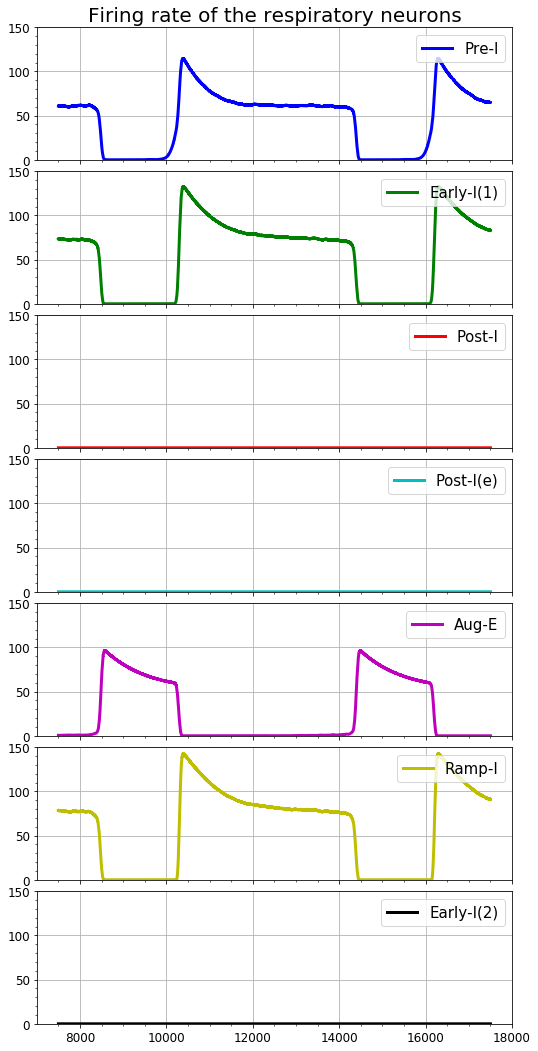

In [29]:
t = PreI_statemon.t[int(duration*n*10):int(duration*m*10)]/ms
y1 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y2 = EarlyI1_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y3 = PostI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y4 = PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y5 = AugE_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y6 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz
y7 = EarlyI2_rate.smooth_rate(window='gaussian', width= 30*ms)[int(duration*n*10):int(duration*m*10)]/Hz

# plt.xlabel("time, ms", labelpad=50, fontsize = 20)
axs = []
lbl = ["Pre-I","Early-I(1)", "Post-I","Post-I(e)","Aug-E","Ramp-I","Early-I(2)"]
clr = ["b","g","r","c","m","y","k"]
data_max = []
data = [y1,y2,y3,y4,y5,y6,y7]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.46], ylim=(0, 1.05*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.46],xticklabels=[],ylim=(0, 1.05*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
#     if i == 0:
plt.title("Firing rate of the respiratory neurons", fontsize = 20)
plt.show()

# fig.savefig("img\Medullary_model.png", format='png',pad_inches=0.2)

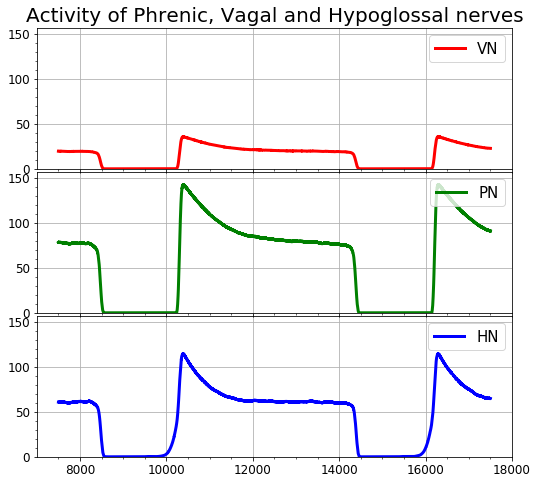

In [30]:
y8 = (6.0/8.0)*PostI_e_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz+(2.0/8.0)*RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y9 = RampI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz
y10 = PreI_rate.smooth_rate(window='gaussian', width= 30*ms)/Hz

y8 = y8[int(duration*n*10):int(duration*m*10)]
y9 = y9[int(duration*n*10):int(duration*m*10)]
y10 = y10[int(duration*n*10):int(duration*m*10)]

# plt.xlabel("time, ms", labelpad=50, fontsize = 20)
axs = []
lbl = ["VN","PN", "HN"]
clr = ["r","g","b"]
data_max = []
data = [y8,y9,y10]
data = data[::-1]
lbl = lbl[::-1]
clr = clr[::-1]
for i in range(len(data)):
    data_max.append(np.max(data[i]))
up_lim = np.max(data_max)


fig = plt.figure()
for i in range(len(data)):
    if i == 0:
        axs.append(fig.add_axes([0.1, 0.4 + 0.5*i, 1.1, 0.49], ylim=(0, 1.1*up_lim)))
    else:
        axs.append(fig.add_axes([0.1, 0.4  + 0.5*i, 1.1, 0.49],xticklabels=[],ylim=(0, 1.1*up_lim)))

for i in range(len(axs)): 
    ax = axs[i]
    ax.plot(t, data[i], label = lbl[i], linewidth = 3, color = clr[i])
    ax.grid(True)
    ax.legend(fontsize=15, loc = 1)
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
plt.title("Activity of Phrenic, Vagal and Hypoglossal nerves", fontsize = 20)
plt.show()
